In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.api import add_constant, Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, classification_report


In [2]:
#Check Current Working directory
os.getcwd()

'C:\\Users\\GOJIRAH'

In [2]:
# Set working directory
os.chdir("D:\\study\\imarticus\\projects\\credit card lead prediction")

# DATA DESCRIPTION
Credit Card Lead Prediction

Predict whether a bank account holder is Potential Credit Card buyer or not!

# ATTRIBUTE INFORMATION

Customer details (gender, age, region etc.)

Details of his/her relationship with the bank (ChannelCode,Vintage, 'AvgAsset_Value etc.)

ID(unique identifier for Row)

Gender(Gender of the Customers)

Age(Age of  the Customers(in Years)

Region Code(Code of the Region for the customers)

Occupation(Occupation type of the Customers)

Channel Code(Acquisition Channel Code for the Customer (Encoded))

Vintage(Vintage for the Customer (In Months)

Credit_Product(If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)


In [3]:
#Importing the Dataset
f_raw = pd.read_csv("data credit card.csv")
f_raw

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


# BASIC DATA CHECKS/ QUALITY CHECKS For Raw Dataset

In [4]:
#viewing the First 5 rows
f_raw.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
#Viewing the last 5 rows
f_raw.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [8]:
#Viewing the first and last 5  rows
f_raw

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [6]:
## Check the data types and entreies for variables
f_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
#Droping the column name : "ID" which is not very usefull in predicting the values
f_raw.drop(["ID"],axis = 1,inplace = True)

In [10]:
# Check the data types for variables
f_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


To Check the class is imbalanced or balanced. We need to count the number of 0's and 1's in the target(is_lead). 
So the countplot is used to visualize the target(is_lead)

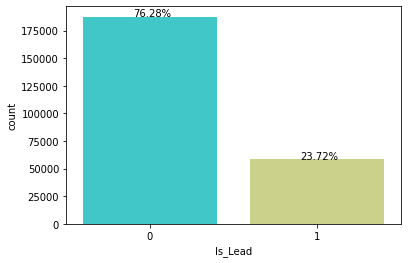

In [11]:
sns.countplot(data = f_raw,x = "Is_Lead",palette = "rainbow")
plt.text(x = -0.1,y = f_raw["Is_Lead"].value_counts()[0]+500,s = str(round((f_raw["Is_Lead"].value_counts()[0])*100/(len(f_raw)),2)) + "%")
plt.text(x = 0.9,y = f_raw["Is_Lead"].value_counts()[1]+500,s = str(round((f_raw["Is_Lead"].value_counts()[1])*100/(len(f_raw)),2)) + "%")
plt.show();

The target(Is_Lead) datapoint class is imbalanced ,It contains the 76% percent of 0 and 23% of percent of 1. To make the class balaced ,we must make some of the duplicate rows which Is_lead is 1

In [5]:
duplicate = f_raw[f_raw["Is_Lead"] == 1]
duplicate

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1
...,...,...,...,...,...,...,...,...,...,...,...
245697,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1
245713,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1


In [6]:
fuu = pd.concat([f_raw,duplicate],ignore_index = True)
fuu.reset_index()

,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304008,304008,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
304009,304009,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
304010,304010,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1
304011,304011,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1


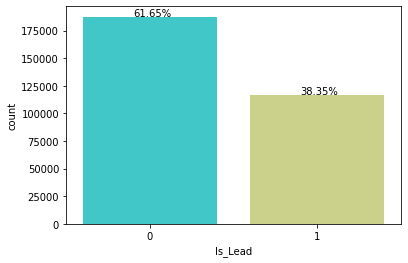

In [14]:
sns.countplot(data = fuu,x = "Is_Lead",palette = "rainbow")
plt.text(x = -0.1,y = fuu["Is_Lead"].value_counts()[0]+500,s = str(round((fuu["Is_Lead"].value_counts()[0])*100/(len(fuu)),2)) + "%")
plt.text(x = 0.9,y = fuu["Is_Lead"].value_counts()[1]+500,s = str(round((fuu["Is_Lead"].value_counts()[1])*100/(len(fuu)),2)) + "%")
plt.show();

Now the target(is_lead) becomes balanced

In [7]:
raw = fuu.copy()

# Checking for the missing values

In [9]:
#Total = Total number of the missing values
#percent = Percentage of the missing values
total = (raw.isna().sum()).sort_values(ascending = False)
percent= (raw.isna().sum()*100/raw.isna().count()).sort_values(ascending = False)
missing_values = pd.concat([total,percent],axis = 1,keys = ["Total","percentage"])

In [10]:
missing_values

,Total,percentage
Credit_Product,54300,17.861078
Is_Lead,0,0.000000
Is_Active,0,0.000000
Avg_Account_Balance,0,0.000000
Vintage,0,0.000000
Channel_Code,0,0.000000
Occupation,0,0.000000
Region_Code,0,0.000000
Age,0,0.000000
Gender,0,0.000000


In [18]:
#Describe is used to view some basic stastical details in continuous features
raw.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,304013.000000,304013.000000,3.040130e+05,304013.000000
mean,45.033068,50.069734,1.144054e+06,0.383457
std,14.676380,33.349242,8.560493e+05,0.486229
min,23.000000,7.000000,2.079000e+04,0.000000
25%,31.000000,21.000000,6.141970e+05,0.000000
50%,45.000000,33.000000,9.109410e+05,0.000000
75%,55.000000,80.000000,1.388738e+06,1.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [19]:
#Describe is used to view some basic stastical details in categorical features
raw.describe(include = "object")

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,304013,304013,304013,304013,249713,304013
unique,2,35,4,4,2,2
top,Male,RG268,Self_Employed,X1,No,No
freq,169780,46707,128727,113200,154980,181573


In [12]:
#it shows the unique values
raw["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
#checking the count of the unique values
raw["Gender"].value_counts()

Male      169780
Female    134233
Name: Gender, dtype: int64

In [56]:
#Checking for the unique values
raw["Region_Code"].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [57]:
#checking the count of the unique values
raw["Region_Code"].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [21]:
#checking the count of the unique values
raw["Occupation"].value_counts()

Self_Employed    128727
Other             87362
Salaried          83495
Entrepreneur       4429
Name: Occupation, dtype: int64

In [22]:
#checking the count of the unique values
raw["Channel_Code"].value_counts()

X1    113200
X3     93931
X2     89933
X4      6949
Name: Channel_Code, dtype: int64

In [23]:
#checking  the unique values
raw["Credit_Product"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [24]:
#checking the count of the unique values
raw["Credit_Product"].value_counts()

No     154980
Yes     94733
Name: Credit_Product, dtype: int64

In [25]:
#The mode of a set of data values is the value that appears most often
raw["Credit_Product"].mode()

0    No
dtype: object

In [19]:
#checking the count of the unique values
raw["Credit_Product"].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [8]:
#For the missing values, the mode
raw["Credit_Product"].fillna("No",inplace = True)

# Checking for the Outlier

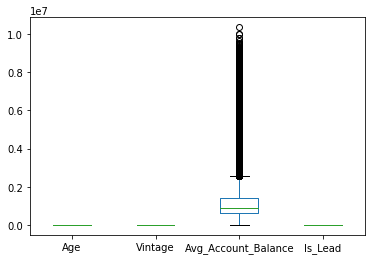

In [27]:
raw.plot(kind = 'box');

In [28]:
raw.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [29]:
raw["Is_Active"].value_counts()

No     181573
Yes    122440
Name: Is_Active, dtype: int64

In [30]:
raw["Is_Lead"].value_counts()

0    187437
1    116576
Name: Is_Lead, dtype: int64

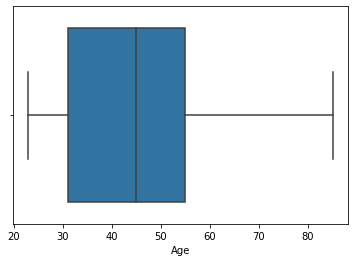

In [31]:
sns.boxplot(raw["Age"])


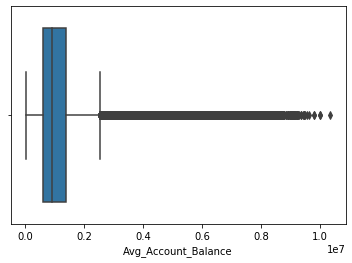

In [33]:
#raw["Avg_Account_balance"] contains the outliers
sns.boxplot(raw["Avg_Account_Balance"]);

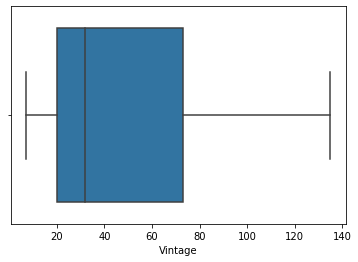

In [80]:
sns.boxplot(raw["Vintage"]);

Removing the outliers for the raw of "Avg_Account_Balance" by using the IQR method 

In [9]:
Q1  = raw["Avg_Account_Balance"].quantile(0.25)
Q3 = raw["Avg_Account_Balance"].quantile(0.75)

IQR = Q3 - Q1

upperbound = Q3 + (1.5 * (IQR))
lowerbound = Q1- (1.5*(IQR))

raw["Avg_Account_Balance"]  = np.where(raw["Avg_Account_Balance"] < lowerbound,lowerbound,raw["Avg_Account_Balance"])
raw["Avg_Account_Balance"]  = np.where(raw["Avg_Account_Balance"] > upperbound,upperbound,raw["Avg_Account_Balance"])

print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')
print(f'IQR : {IQR}')
print(f'lowerbound : {lowerbound}')
print(f'upperbound : {upperbound}')

Q1 : 614197.0
Q3 : 1388738.0
IQR : 774541.0
lowerbound : -547614.5
upperbound : 2550549.5


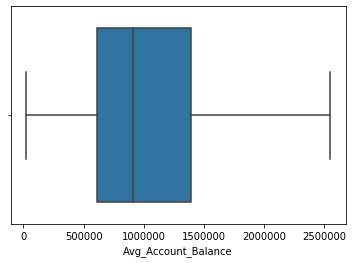

In [35]:
#plotting the boxplot After removing the outliers
sns.boxplot(raw["Avg_Account_Balance"]);

In [162]:
raw["Avg_Account_Balance"].describe()

count    2.457250e+05
mean     1.060996e+06
std      6.072687e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      2.510200e+06
Name: Avg_Account_Balance, dtype: float64

In [36]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304013 entries, 0 to 304012
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               304013 non-null  object 
 1   Age                  304013 non-null  int64  
 2   Region_Code          304013 non-null  object 
 3   Occupation           304013 non-null  object 
 4   Channel_Code         304013 non-null  object 
 5   Vintage              304013 non-null  int64  
 6   Credit_Product       304013 non-null  object 
 7   Avg_Account_Balance  304013 non-null  float64
 8   Is_Active            304013 non-null  object 
 9   Is_Lead              304013 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.2+ MB


In [37]:
#checking the count of the unique values
raw['Gender'].value_counts()

Male      169780
Female    134233
Name: Gender, dtype: int64

# UNIVARIATE ANALYSIS

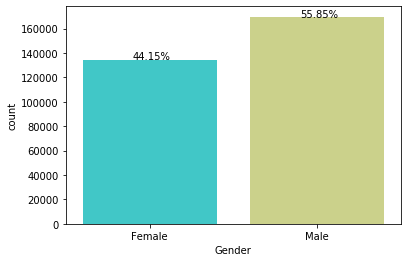

In [38]:
sns.countplot(data = raw,x = "Gender",palette = "rainbow")
plt.text(x = -0.1,y = raw["Gender"].value_counts()[1]+500,s = str(round((raw["Gender"].value_counts()[1])*100/(len(raw)),2)) + "%")
plt.text(x = 0.9,y = raw["Gender"].value_counts()[0]+20,s = str(round((raw["Gender"].value_counts()[0])*100/(len(raw)),2)) + "%")
plt.show();

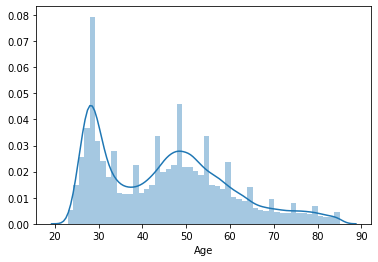

In [39]:
sns.distplot(raw["Age"]);

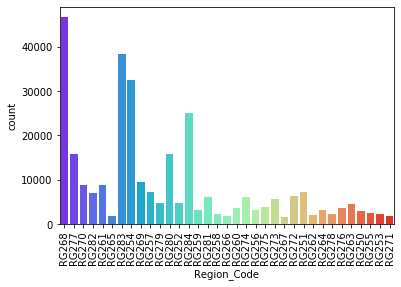

In [40]:
sns.countplot(data = raw,x = 'Region_Code',palette = "rainbow")
plt.xticks(rotation= "vertical");

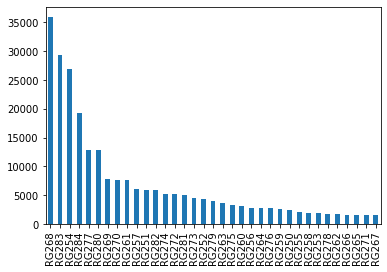

In [50]:
raw["Region_Code"].value_counts().plot(kind = "bar");

In [41]:
raw["Occupation"].value_counts()

Self_Employed    128727
Other             87362
Salaried          83495
Entrepreneur       4429
Name: Occupation, dtype: int64

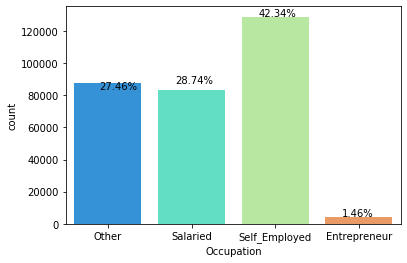

In [42]:
sns.countplot(data = raw,x = "Occupation",palette = "rainbow")
plt.text(x= -0.1,y = raw["Occupation"].value_counts()[2]+200,s =str(round((raw["Occupation"].value_counts()[2])*100/(len(raw)),2)) + "%")
plt.text(x= 0.8,y = raw["Occupation"].value_counts()[1]+200,s =str(round((raw["Occupation"].value_counts()[1])*100/(len(raw)),2)) + "%")
plt.text(x= 1.8,y = raw["Occupation"].value_counts()[0]+100,s =str(round((raw["Occupation"].value_counts()[0])*100/(len(raw)),2)) + "%")
plt.text(x= 2.8,y = raw["Occupation"].value_counts()[3]+100,s =str(round((raw["Occupation"].value_counts()[3])*100/(len(raw)),2)) + "%")
plt.show();

In [63]:
raw["Channel_Code"].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

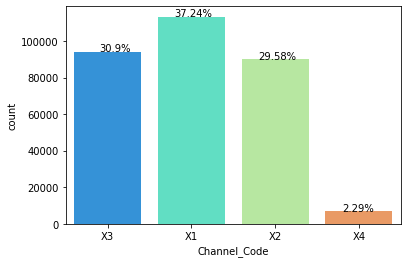

In [43]:
sns.countplot(data = raw,x = "Channel_Code",palette = "rainbow")
plt.text(x= -0.1,y = raw["Channel_Code"].value_counts()[1]+200,s =str(round((raw["Channel_Code"].value_counts()[1])*100/(len(raw)),2)) + "%")
plt.text(x= 0.8,y = raw["Channel_Code"].value_counts()[0]+200,s =str(round((raw["Channel_Code"].value_counts()[0])*100/(len(raw)),2)) + "%")
plt.text(x= 1.8,y = raw["Channel_Code"].value_counts()[2]+100,s =str(round((raw["Channel_Code"].value_counts()[2])*100/(len(raw)),2)) + "%")
plt.text(x= 2.8,y = raw["Channel_Code"].value_counts()[3]+100,s =str(round((raw["Channel_Code"].value_counts()[3])*100/(len(raw)),2)) + "%")
plt.show();

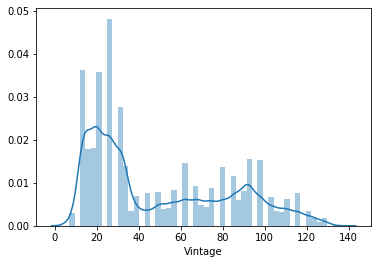

In [44]:
sns.distplot(raw["Vintage"]);

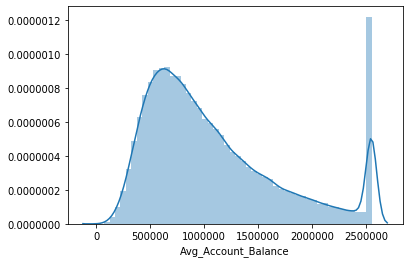

In [45]:
sns.distplot(raw["Avg_Account_Balance"]);

In [46]:
raw["Credit_Product"].value_counts()

No     209280
Yes     94733
Name: Credit_Product, dtype: int64

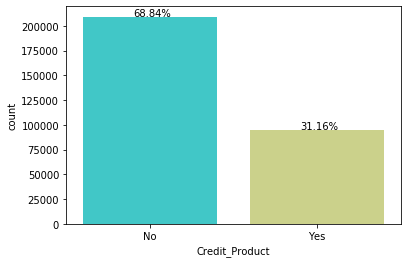

In [47]:
sns.countplot(data = raw,x = "Credit_Product",palette = "rainbow")
plt.text(x = -0.1,y = raw["Credit_Product"].value_counts()[0]+500,s = str(round((raw["Credit_Product"].value_counts()[0])*100/(len(raw)),2)) + "%")
plt.text(x = 0.9,y = raw["Credit_Product"].value_counts()[1]+500,s = str(round((raw["Credit_Product"].value_counts()[1])*100/(len(raw)),2)) + "%")
plt.show();

In [48]:
raw['Is_Active'].value_counts()

No     181573
Yes    122440
Name: Is_Active, dtype: int64

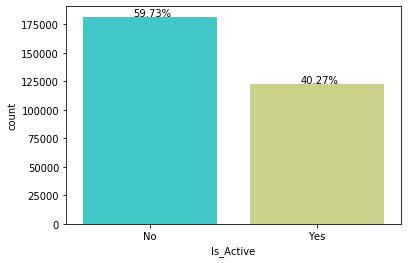

In [49]:
sns.countplot(data = raw,x = "Is_Active",palette = "rainbow")
plt.text(x = -0.1,y = raw["Is_Active"].value_counts()[0]+500,s = str(round((raw["Is_Active"].value_counts()[0])*100/(len(raw)),2)) + "%")
plt.text(x = 0.9,y = raw["Is_Active"].value_counts()[1]+500,s = str(round((raw["Is_Active"].value_counts()[1])*100/(len(raw)),2)) + "%")
plt.show();

In [50]:
raw["Is_Lead"].value_counts()

0    187437
1    116576
Name: Is_Lead, dtype: int64

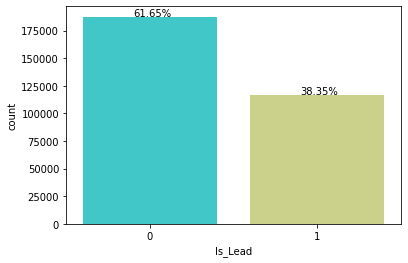

In [51]:
sns.countplot(data = raw,x = "Is_Lead",palette = "rainbow")
plt.text(x = -0.1,y = raw["Is_Lead"].value_counts()[0]+500,s = str(round((raw["Is_Lead"].value_counts()[0])*100/(len(raw)),2)) + "%")
plt.text(x = 0.9,y = raw["Is_Lead"].value_counts()[1]+500,s = str(round((raw["Is_Lead"].value_counts()[1])*100/(len(raw)),2)) + "%")
plt.show();

In [52]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304013 entries, 0 to 304012
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               304013 non-null  object 
 1   Age                  304013 non-null  int64  
 2   Region_Code          304013 non-null  object 
 3   Occupation           304013 non-null  object 
 4   Channel_Code         304013 non-null  object 
 5   Vintage              304013 non-null  int64  
 6   Credit_Product       304013 non-null  object 
 7   Avg_Account_Balance  304013 non-null  float64
 8   Is_Active            304013 non-null  object 
 9   Is_Lead              304013 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.2+ MB


# BIVARIATE ANALYSIS

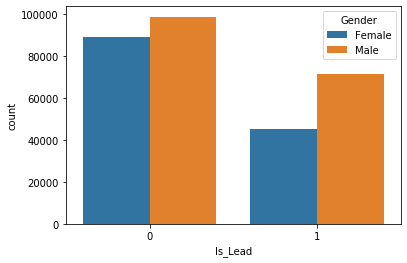

In [53]:
sns.countplot(raw["Is_Lead"],hue = raw["Gender"]);

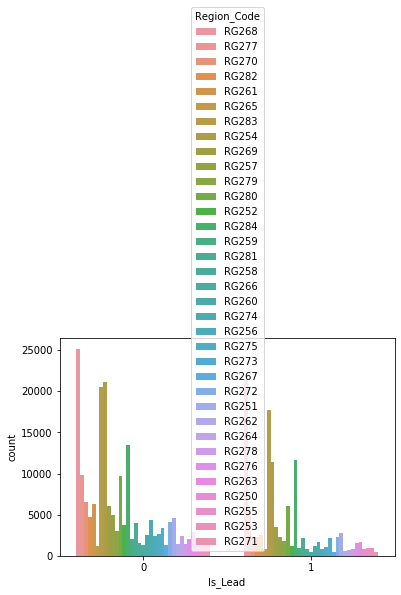

In [54]:
sns.countplot(raw["Is_Lead"],hue = raw["Region_Code"]);

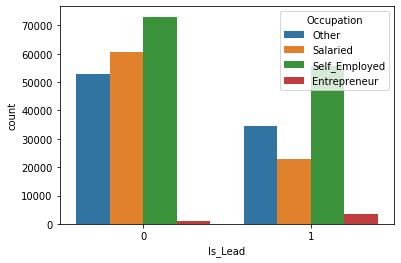

In [55]:
sns.countplot(raw["Is_Lead"],hue = raw["Occupation"]);

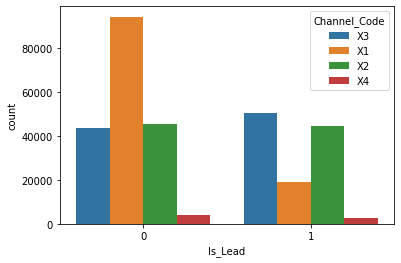

In [56]:
sns.countplot(raw["Is_Lead"],hue = raw["Channel_Code"]);

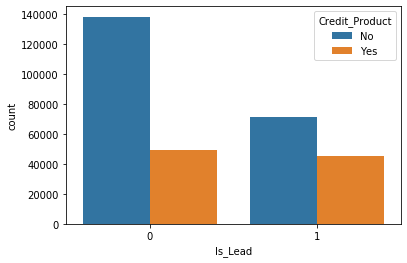

In [57]:
sns.countplot(raw["Is_Lead"],hue = raw["Credit_Product"]);

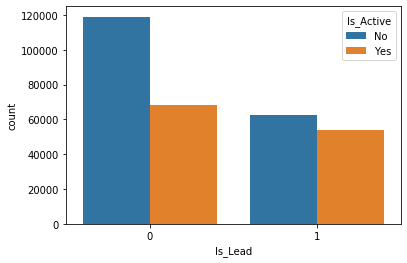

In [58]:
sns.countplot(raw["Is_Lead"],hue = raw["Is_Active"]);

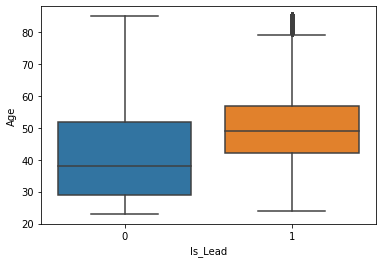

In [59]:
sns.boxplot(x = raw['Is_Lead'],y = raw["Age"]);

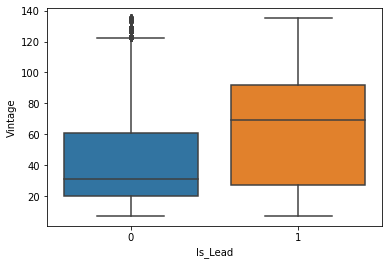

In [60]:
sns.boxplot(x = raw['Is_Lead'],y = raw["Vintage"]);

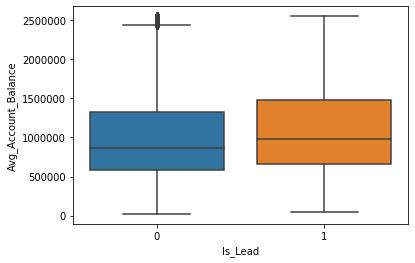

In [61]:
sns.boxplot(x = raw['Is_Lead'],y = raw["Avg_Account_Balance"]);

In [62]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# MULTIVARIATE ANALYSIS

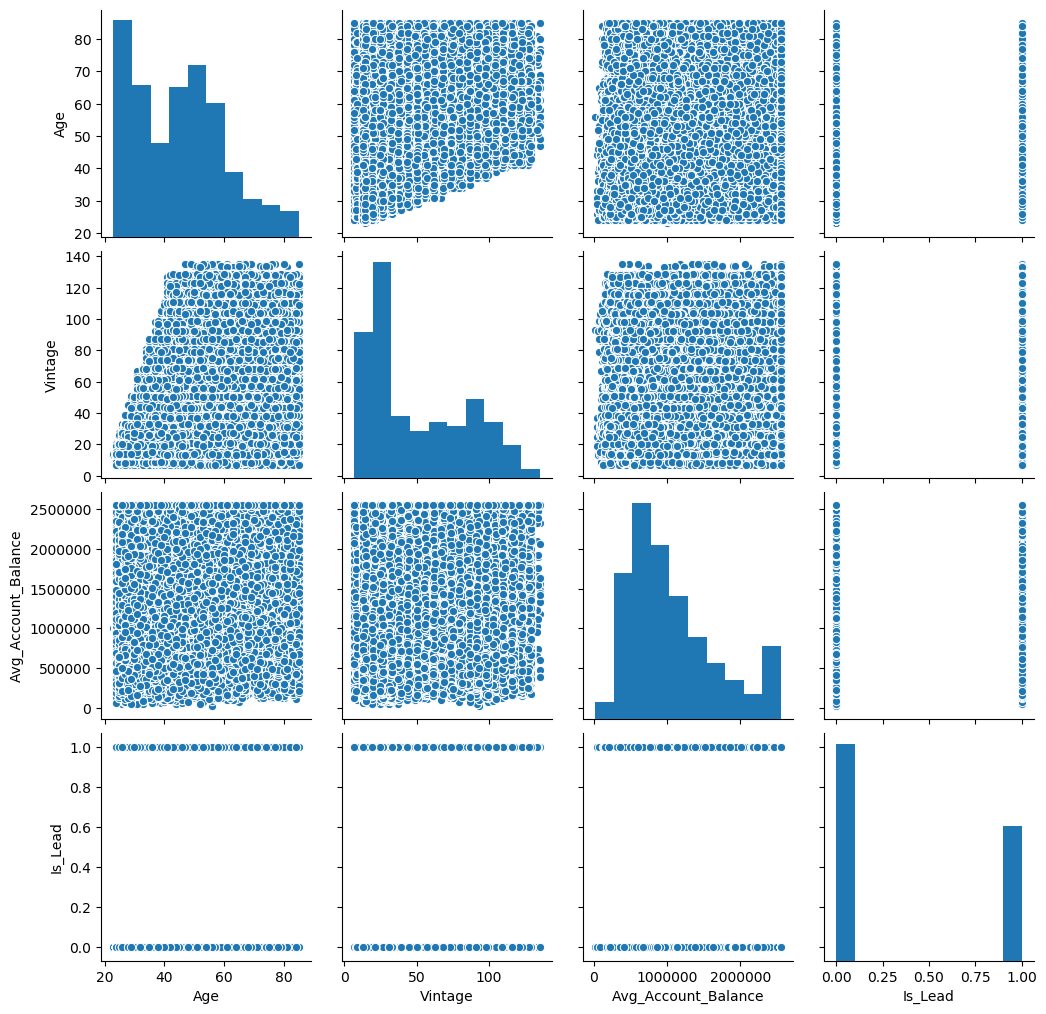

In [63]:
sns.pairplot(raw)

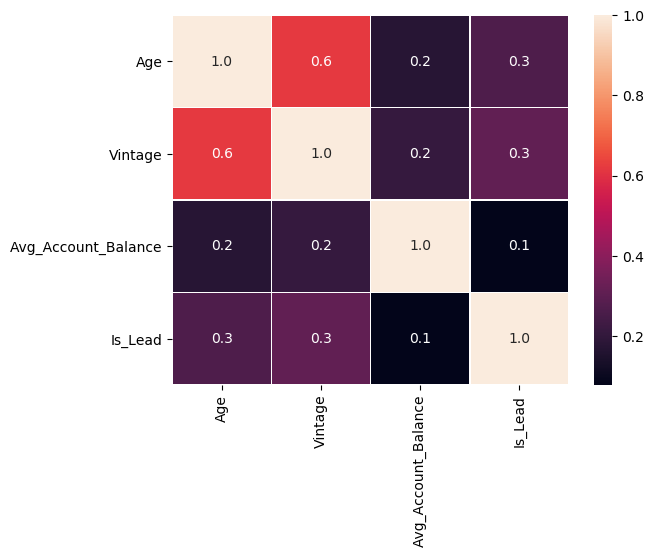

In [64]:
sns.heatmap(raw.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [65]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304013 entries, 0 to 304012
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               304013 non-null  object 
 1   Age                  304013 non-null  int64  
 2   Region_Code          304013 non-null  object 
 3   Occupation           304013 non-null  object 
 4   Channel_Code         304013 non-null  object 
 5   Vintage              304013 non-null  int64  
 6   Credit_Product       304013 non-null  object 
 7   Avg_Account_Balance  304013 non-null  float64
 8   Is_Active            304013 non-null  object 
 9   Is_Lead              304013 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.2+ MB


In [10]:
raw.drop(["Region_Code"],axis = 1,inplace =True)

# SAMPLE 

In [11]:
#Making the copy
fullRaw = raw.copy()

Divide the full dataset into train and test

In [12]:
#spliting the raw data into train and test
trainRaw, testRaw = train_test_split(fullRaw, train_size=0.75, random_state = 150)
# random_state ensures reproducibility of same random results. 
print(trainRaw.shape)
print(testRaw.shape)

(228009, 10)
(76004, 10)


In [13]:

trainRaw = trainRaw.copy()
testRaw = testRaw.copy()

trainRaw["Source"] = "Train"
testRaw["Source"] = "Test"

In [14]:
# Combine Train, Test,
fullRaw = pd.concat([trainRaw, testRaw], axis = 0)
fullRaw.shape

(304013, 11)

In [15]:
columns = ["Age","Vintage","Avg_Account_Balance"]
fullRaw[columns]

,Age,Vintage,Avg_Account_Balance
49936,30,25,1663641.0
260530,49,92,1808302.0
161255,64,69,2530056.0
26690,73,50,716832.0
105527,32,31,1078413.0
...,...,...,...
117955,45,74,1172619.0
188172,27,31,456018.0
278056,48,91,1143997.0
248042,50,127,1107578.0


There is no outliers .so that we can do the Normalization


Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range. Normalization makes the features more consistent with each other, which allows the model to predict outputs more accurately.

# NORMALIZATION


In [16]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(fullRaw[columns])

In [18]:
scaled.shape

(304013, 3)

In [19]:
normalization = pd.DataFrame(scaled)
normalization

,0,1,2
0,0.112903,0.140625,0.649410
1,0.419355,0.664062,0.706594
2,0.661290,0.484375,0.991899
3,0.806452,0.335938,0.275142
4,0.145161,0.187500,0.418073
...,...,...,...
304008,0.354839,0.523438,0.455312
304009,0.064516,0.187500,0.172043
304010,0.403226,0.656250,0.443998
304011,0.435484,0.937500,0.429601


In [20]:
normalization = normalization.rename(columns = {0:"Age",1:"Vintage",2:"Avg_Account_Balance"})

In [21]:
fullRaw.drop(["Age","Vintage","Avg_Account_Balance"],axis = 1,inplace =True)

In [29]:
fullRaw.drop(["ID","Channel_Code"],axis = 1,inplace = True)

In [30]:
cat = [col for col in fullRaw.columns if fullRaw[col].dtype == "object"]
cat

['Gender', 'Occupation', 'Credit_Product', 'Is_Active', 'Source']

In [28]:
fullRaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304013 entries, 49936 to 200817
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              304013 non-null  object
 1   Gender          304013 non-null  object
 2   Occupation      304013 non-null  object
 3   Channel_Code    304013 non-null  object
 4   Credit_Product  304013 non-null  object
 5   Is_Active       304013 non-null  object
 6   Is_Lead         304013 non-null  int64 
 7   Source          304013 non-null  object
dtypes: int64(1), object(7)
memory usage: 20.9+ MB


In [31]:
# Lets create dummy variables out of the categorical variables

categorical= pd.get_dummies(fullRaw[cat], drop_first = True).copy() # 'Source'  column will change to 'Source_Train'
print(categorical.shape)
categorical.head()

(304013, 7)


,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_Yes,Is_Active_Yes,Source_Train
49936,0,0,1,0,0,0,1
260530,1,0,1,0,1,1,1
161255,1,1,0,0,0,0,1
26690,1,1,0,0,0,1,1
105527,0,1,0,0,0,0,1


In [32]:
fullRaw2 = pd.concat([normalization,categorical],axis = 1)


In [36]:
fullRaw2["Is_Lead"] = raw["Is_Lead"]

In [37]:
#Divide the full data
Train = fullRaw2[fullRaw2['Source_Train'] == 1].drop(['Source_Train'], axis = 1).copy()
Test = fullRaw2[fullRaw2['Source_Train'] == 0].drop(['Source_Train'], axis = 1).copy()

print(Train.shape)
print(Test.shape)


(228009, 10)
(76004, 10)


In [38]:
#Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

trainX = Train.drop(['Is_Lead'], axis = 1).copy()
trainY = Train['Is_Lead'].copy()
testX = Test.drop(['Is_Lead'], axis = 1).copy()
testY = Test['Is_Lead'].copy()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(228009, 9)
(228009,)
(76004, 9)
(76004,)


In [39]:
#In Statsmodels, logistic regression function does NOT account for an intercept by default.
# So, we need to explicitely add intercept (in the df) - a column called "const" with all values being 1 in it.

trainX = add_constant(trainX)
testX = add_constant(testX)

print(trainX.shape)
print(testX.shape)

(228009, 10)
(76004, 10)


In [40]:
trainX

,const,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_Yes,Is_Active_Yes
0,1.0,0.112903,0.140625,0.649410,0,1,0,0,0,0
1,1.0,0.419355,0.664062,0.706594,0,0,1,0,0,0
3,1.0,0.806452,0.335938,0.275142,1,0,1,0,0,0
4,1.0,0.145161,0.187500,0.418073,0,0,1,0,0,0
5,1.0,0.080645,0.187500,0.242399,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
304008,1.0,0.354839,0.523438,0.455312,1,0,1,0,0,1
304009,1.0,0.064516,0.187500,0.172043,1,1,0,0,0,1
304010,1.0,0.403226,0.656250,0.443998,1,0,0,1,1,1
304011,1.0,0.435484,0.937500,0.429601,0,0,0,1,1,1


In [148]:
trainX.drop(["const"],axis = 1,inplace =True)
testX.drop(["const"],axis = 1,inplace =True)

# MODEL BUILDING

# Logistic Regression

In [41]:
m1Model = Logit(trainY, trainX).fit() # Dep, Indep
m1Model.summary() # This is model output summary

Optimization terminated successfully.
         Current function value: 0.639266
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               228009
Model:                          Logit   Df Residuals:                   227999
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                 0.03956
Time:                        18:25:27   Log-Likelihood:            -1.4576e+05
converged:                       True   LL-Null:                   -1.5176e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7635      0.045     16.826      0.000       0.675       0.852
Age                         -0.0010      0.024     -0.043      0.966      -0.048       0.046
Vintage                     -0.0010      0.022     -0.045      0.964      -0.044       0.042
Avg_Account_Balance         -0.0138      0.019     -0.740      0.459      -0.050       0.023
Gender_Male                  0.2659      0.009     29.528      0.000       0.248       0.284
Occupation_Other            -1.6842      0.044    -37.919      0.000      -1.771      -1.597
Occupation_Salaried         -2.0879      0.045    -46.749      0.000      -2.175      -2.000
Occupation_Self_Employed    -1.5588      0.044    -35.298      0.000      -1.645      -1.472
Credit_Product_Yes           0.5467      0.009     57.559      0.000       0.528       0.565
Is_Active_Yes                0.3572      0.009     38.898      0.000       0.339       0.375
============================================================================================
"""

# Variance Inflation Factor (VIF)

Check for Multicollinearity
VIF is usually a little relaxed compared to linear regression (as the impact of multicollinearity reduces due to the non-linearity the logistic/sigmoid function brings). So, VIF threshold is usually kept at 10

In [42]:
tempMaxVIF = 10
maxVIF = 10
trainXCopy = trainX.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        print(counter)
        print(tempColumnName)
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1


1
const


In [43]:
highVIFColumnNames

['const']

In [44]:
# Lets drop all the insignificant columns (based on highVIf) from the train and test datasets

trainX = trainX.drop(highVIFColumnNames, axis = 1)
testX = testX.drop(highVIFColumnNames, axis = 1)

print(trainX.shape)
print(testX.shape)

(228009, 9)
(76004, 9)


Model optimization

In [45]:
# We will use a for loop and discard indep variables based on "p-value"
# The concept of the for loop will remain very similar to VIF loop.

tempMaxPValue = 0.05
maxPValue = 0.05
trainXCopy = trainX.copy()
counter = 1
highPValueColumnNames = []


while (tempMaxPValue >= maxPValue):
    
    tempModelDf = pd.DataFrame()    
    Model = Logit(trainY, trainXCopy).fit()
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) # If there is some calculation error resulting in NAs
    tempColumnName = tempModelDf.sort_values(["PValue"])[-1:]["Column_Name"].values[0]
    tempMaxPValue = tempModelDf.sort_values(["PValue"])[-1:]["PValue"].values[0]
    
    if (tempMaxPValue >= maxPValue): # This condition will ensure that ONLY columns having p-value lower than 0.05 are NOT dropped
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

print(highPValueColumnNames)

Optimization terminated successfully.
         Current function value: 0.639960
         Iterations 5
Vintage 0.6354989588963738
Optimization terminated successfully.
         Current function value: 0.639960
         Iterations 5
['Vintage']


In [52]:
highPValueColumnNames

['Vintage']

In [55]:
# Lets drop all the insignificant columns (based on pvalues) from the train and test datasets

trainX = trainX.drop(highPValueColumnNames, axis = 1)
testX = testX.drop(highPValueColumnNames, axis = 1)

print(trainX.shape)
print(testX.shape)

(228009, 8)
(76004, 8)


In [56]:
testX.shape

(76004, 8)

In [54]:
testY.shape

(76004,)

In [57]:
# Build the model again with just the significant variables

m2Model = Logit(trainY, trainX).fit()
m2Model.summary() # This is model output summary

Optimization terminated successfully.
         Current function value: 0.639960
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               228009
Model:                          Logit   Df Residuals:                   228001
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                 0.03851
Time:                        18:31:38   Log-Likelihood:            -1.4592e+05
converged:                       True   LL-Null:                   -1.5176e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.0431      0.019      2.295      0.022       0.006       0.080
Avg_Account_Balance          0.0374      0.018      2.054      0.040       0.002       0.073
Gender_Male                  0.2859      0.009     32.050      0.000       0.268       0.303
Occupation_Other            -0.9852      0.014    -70.479      0.000      -1.013      -0.958
Occupation_Salaried         -1.3827      0.014    -99.787      0.000      -1.410      -1.356
Occupation_Self_Employed    -0.8615      0.013    -64.324      0.000      -0.888      -0.835
Credit_Product_Yes           0.5684      0.009     60.493      0.000       0.550       0.587
Is_Active_Yes                0.3749      0.009     41.147      0.000       0.357       0.393
============================================================================================
"""

In [58]:
testPredDf_l = pd.DataFrame()

# Get probabilities
testPredDf_l["Predicted_Prob"] = m2Model.predict(testX) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf_l["Predicted_Class"] = np.where(testPredDf_l['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
testPredDf_l["Actual"] = testY.values

# Validate if the above worked
testPredDf_l.head()

,Predicted_Prob,Predicted_Class,Actual
2,0.396281,0,0
10,0.453846,0,0
15,0.452809,0,1
17,0.406435,0,1
18,0.359726,0,0


In [59]:
confusionMatrix = pd.crosstab(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,41943,4851
1,22881,6329


In [60]:
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100

63.512446713330874

In [61]:
# The following calculations by DEFAULT are for 1s (Precision of 1s, Recall of 1s and then F1-Score of 1s)

print("Precision: ", precision_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class'])) # Actual, Predicted
print("F1-Score: ", f1_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class'])) # Actual, Predicted

Precision:  0.5661001788908766
Recall:  0.21667237247517973
F1-Score:  0.31339440455558304


In [35]:
print(classification_report(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     46794
           1       0.58      0.46      0.51     29210

    accuracy                           0.66     76004
   macro avg       0.64      0.62      0.63     76004
weighted avg       0.65      0.66      0.65     76004



In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [37]:
trainX.drop(["const"],axis = 1,inplace =True)
testX.drop(["const"],axis = 1,inplace =True)

In [190]:
trainX

,Gender_Male,Region_Code_RG251,Region_Code_RG253,Region_Code_RG255,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG261,Region_Code_RG263,Region_Code_RG265,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304008,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
304009,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
304010,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,1
304011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1


In [191]:
trainY

0         0
1         0
3         0
4         0
5         0
         ..
304008    1
304009    1
304010    1
304011    1
304012    1
Name: Is_Lead, Length: 228009, dtype: int64

# RANDOM FOREST CLASSIFIER

In [64]:
M1 = RandomForestClassifier(random_state=123)
M1 = M1.fit(trainX,trainY.astype("int64"))

In [193]:
trainX

,Gender_Male,Region_Code_RG251,Region_Code_RG253,Region_Code_RG255,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG261,Region_Code_RG263,Region_Code_RG265,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304008,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
304009,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
304010,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,1
304011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1


In [194]:
trainY

0         0
1         0
3         0
4         0
5         0
         ..
304008    1
304009    1
304010    1
304011    1
304012    1
Name: Is_Lead, Length: 228009, dtype: int64

In [195]:
testX

,Gender_Male,Region_Code_RG251,Region_Code_RG253,Region_Code_RG255,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG261,Region_Code_RG263,Region_Code_RG265,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
17,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303988,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
303993,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
303994,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
303996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [196]:
testY

2         0
10        0
15        1
17        1
18        0
         ..
303988    1
303993    1
303994    1
303996    1
304007    1
Name: Is_Lead, Length: 76004, dtype: int64

In [65]:
testPredDf_r = pd.DataFrame()

# Get probabilities
testPredDf_r['Predicted_Class'] = M1.predict(testX) # Store probability predictions in "testX" df


# Create a column to store actuals
testPredDf_r["Actual"] = testY.values

# Validate if the above worked
testPredDf_r.head()

,Predicted_Class,Actual
0,1,0
1,1,0
2,1,1
3,0,1
4,1,0


In [41]:
confusionMatrix = pd.crosstab(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,38391,8403
1,15440,13770


In [58]:
print("Precision: ", precision_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class'])) # Actual, Predicted
print("F1-Score: ", f1_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class'])) # Actual, Predicted

Precision:  0.6210255716411852
Recall:  0.4714138993495378
F1-Score:  0.5359749333437129


In [42]:
print(classification_report(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.47      0.54     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



# HyperParameter Tuning of the Random Forest Classifier

To find the best tuning parameter of the Random Forest Classifier .we are doing gridsearchcv

In [204]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params_rf = {'n_estimators':[100,250, 350, 500], 'min_samples_leaf':[2, 5,10, 30,50,100]}
grid_rf = GridSearchCV(M1, params_rf, cv=5,verbose = 2)
rs_rf = RandomizedSearchCV(M1, params_rf, cv=5,verbose = 2)
grid_rf.fit(trainX,trainY)
rs_rf.fit(trainX,trainY)
print('Best grid parameters for Random Forest:', grid_rf.best_params_)
print('Best randomized parameters for Random Forest:', rs_rf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=  17.8s
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=  17.4s
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=  18.0s
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=  21.0s
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=  19.7s
[CV] END ...............min_samples_leaf=2, n_estimators=250; total time=  43.9s
[CV] END ...............min_samples_leaf=2, n_estimators=250; total time=  43.8s
[CV] END ...............min_samples_leaf=2, n_estimators=250; total time=  43.7s
[CV] END ...............min_samples_leaf=2, n_estimators=250; total time=  43.8s
[CV] END ...............min_samples_leaf=2, n_estimators=250; total time=  44.1s
[CV] END ...............min_samples_leaf=2, n_estimators=350; total time= 1.1min
[CV] END ...............min_samples_leaf=2, n_e

In [43]:
M1_rf = RandomForestClassifier(random_state=123,n_estimators = 350,min_samples_leaf = 5)
M1_rf = M1_rf.fit(trainX,trainY.astype("int64"))

In [44]:
testPredDf_rf = pd.DataFrame()

# Get probabilities
testPredDf_rf['Predicted_Class'] = M1_rf.predict(testX) # Store probability predictions in "testX" df


# Create a column to store actuals
testPredDf_rf["Actual"] = testY.values

# Validate if the above worked
testPredDf_rf.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [45]:
confusionMatrix = pd.crosstab(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,38164,8630
1,15215,13995


In [46]:
print(classification_report(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.48      0.54     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



In [47]:
M1_rf2 = RandomForestClassifier(random_state=123,n_estimators = 250,min_samples_leaf = 5)
M1_rf2 = M1_rf2.fit(trainX,trainY.astype("int64"))

In [48]:
testPredDf_rf2 = pd.DataFrame()

# Get probabilities
testPredDf_rf2['Predicted_Class'] = M1_rf2.predict(testX) # Store probability predictions in "testX" df


# Create a column to store actuals
testPredDf_rf2["Actual"] = testY.values

# Validate if the above worked
testPredDf_rf2.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [49]:
confusionMatrix = pd.crosstab(testPredDf_rf2["Actual"], testPredDf_rf2['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,38181,8613
1,15233,13977


In [50]:
print(classification_report(testPredDf_rf2["Actual"], testPredDf_rf2['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.48      0.54     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



# DECISION TREE CLASSIFIER


In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


M2 = DecisionTreeClassifier(random_state=123, min_samples_leaf = 10)
M2 = M2.fit(trainX,trainY)

In [52]:
testPredDf_d = pd.DataFrame()

# Get probabilities
testPredDf_d['Predicted_Class'] = M2.predict(testX) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_d["Actual"] = testY.values

# Validate if the above worked
testPredDf_d.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [53]:
confusionMatrix = pd.crosstab(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,38451,8343
1,15505,13705


In [72]:
print("Precision: ", precision_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class'])) # Actual, Predicted
print("F1-Score: ", f1_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class'])) # Actual, Predicted

Precision:  0.6215983309143687
Recall:  0.469188634029442
F1-Score:  0.53474579577822


In [54]:
print(classification_report(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.47      0.53     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



#  HyperParameter tuning of Decision Tree Classifier

In [234]:
para_dt = {'criterion':['gini','entropy'],'max_depth':[10,20,30,44,50], 'min_samples_leaf':[10,20,40,80]}
grid_dt = GridSearchCV(M2, para_dt, cv=3,verbose = 1)
rs_dt = RandomizedSearchCV(M2,para_dt,cv=3,verbose = 1)
grid_dt.fit(trainX,trainY)
rs_dt.fit(trainX,trainY)
print('Best grid parameters for Decision Tree:', grid_dt.best_params_)
print('Best randomized parameters for Decision Tree:', rs_dt.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best grid parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20}
Best randomized parameters for Decision Tree: {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}


In [55]:
M2_df = DecisionTreeClassifier(random_state=123, min_samples_leaf = 20,max_depth = 20,criterion = "gini")
M2_df = M2_df.fit(trainX,trainY)

In [56]:
testPredDf_dt = pd.DataFrame()

# Get probabilities
testPredDf_dt['Predicted_Class'] = M2.predict(testX) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_dt["Actual"] = testY.values

# Validate if the above worked
testPredDf_dt.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [57]:
confusionMatrix = pd.crosstab(testPredDf_dt["Actual"], testPredDf_dt['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,38451,8343
1,15505,13705


In [58]:
print(classification_report(testPredDf_dt["Actual"], testPredDf_dt['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.47      0.53     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



In [59]:
M2_df1 = DecisionTreeClassifier(random_state=123, min_samples_leaf = 20,max_depth = 20,criterion = "entropy")
M2_df1 = M2_df.fit(trainX,trainY)

In [60]:
testPredDf_dt1 = pd.DataFrame()

# Get probabilities
testPredDf_dt1['Predicted_Class'] = M2.predict(testX) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_dt1["Actual"] = testY.values

# Validate if the above worked
testPredDf_dt1.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [61]:
confusionMatrix = pd.crosstab(testPredDf_dt1["Actual"], testPredDf_dt1['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,38451,8343
1,15505,13705


In [62]:
print(classification_report(testPredDf_dt1["Actual"], testPredDf_dt1['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.47      0.53     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



# Boosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

In [64]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(228009, 31)
(228009,)
(76004, 31)
(76004,)


# GRADIENT BOOSTING CLASSIFIER

In [65]:
M3 = GradientBoostingClassifier(random_state=123).fit(trainX, trainY) # Indep, Dep

In [66]:
testPredDf_gb = pd.DataFrame()

testPredDf_gb["Prediction"] = M3.predict(testX)

# Create a column to store actuals
testPredDf_gb["Actual"] = testY.values

# Validate if the above worked
testPredDf_gb.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [67]:
testPredDf_gb["Prediction"].value_counts()

0    58145
1    17859
Name: Prediction, dtype: int64

In [68]:
confussionMatrix = pd.crosstab(testPredDf_gb["Actual"],testPredDf_gb["Prediction"])
confussionMatrix

Prediction,0,1
Actual,,
0,40254,6540
1,17891,11319


In [69]:
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100

68.62270406820694

In [70]:
print(classification_report(testPredDf_gb["Actual"],testPredDf_gb["Prediction"]))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77     46794
           1       0.63      0.39      0.48     29210

    accuracy                           0.68     76004
   macro avg       0.66      0.62      0.62     76004
weighted avg       0.67      0.68      0.66     76004



# ADA BOOSTING CLASSIFIER

In [71]:
M4 = AdaBoostClassifier(random_state = 123).fit(trainX,trainY)

In [72]:
testPredDf_ab = pd.DataFrame()

testPredDf_ab["Prediction"] = M4.predict(testX)
testPredDf_ab["Actual"] = testY.values

testPredDf_ab.head()

C:\Users\GOJIRAH\anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


,Prediction,Actual
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0


In [73]:
confussionMatrix = pd.crosstab(testPredDf_ab["Actual"],testPredDf_ab["Prediction"])
confussionMatrix

Prediction,0,1
Actual,,
0,35488,11306
1,14744,14466


In [74]:
print(classification_report(testPredDf_ab["Actual"],testPredDf_ab["Prediction"]))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     46794
           1       0.56      0.50      0.53     29210

    accuracy                           0.66     76004
   macro avg       0.63      0.63      0.63     76004
weighted avg       0.65      0.66      0.65     76004



# XG BOOSTING CLASSIFIER

In [76]:
M5 = XGBClassifier(random_state = 123).fit(trainX,trainY)

[17:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
testPredDf_xg= pd.DataFrame()

testPredDf_xg["Prediction"] = M5.predict(testX)

# Create a column to store actuals
testPredDf_xg["Actual"] = testY.values

# Validate if the above worked
testPredDf_xg.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [78]:
confussionMatrix = pd.crosstab(testPredDf_xg["Actual"],testPredDf_xg["Prediction"])
confussionMatrix


Prediction,0,1
Actual,,
0,38192,8602
1,15212,13998


In [79]:
print(classification_report(testPredDf_xg["Actual"],testPredDf_xg['Prediction']))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     46794
           1       0.62      0.48      0.54     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



# TUNING PARAMETER OF GRADIENT BOOSTING,ADABOOSTING AND XGBOOSTING CLASSIFIER

In [264]:
# Lay out the different models upfront
model1 = AdaBoostClassifier(random_state=123)
model2 = GradientBoostingClassifier(random_state=123)
model3 = XGBClassifier(random_state=123)

# Initialize the pipeline with a single model and you can add models later on
myPipeline = Pipeline(steps = [("model", model1)]) 
# The word "model" has to be SAME, to address other algorithms too.
# Instead of the word "model", you can use anything, like "abc" - but you have to ensure that "abc" is used 
# below while defining the other models/algorithms within myParamGrid. The word can be anything, but has to be consistent. 

# Add a dict of estimator and estimator related parameters in this list
myParamGrid = [
    {
        "model": [model1],
        "model__n_estimators": [10,20], # The format of using a "hyperparameter" is to append "name" with "double underscore"
        "model__learning_rate": [0.1, 0.5, 1]
    },
    {
        "model": [model2],
        "model__min_samples_leaf": [2,3,4],
        "model__max_depth": [3,4],
        "model__learning_rate": [0.1, 0.5, 1]
    },
    {
        "model": [model3],
        "model__lambda": [0,1,2],
        "model__gamma": [0,1]
    }]
# Check this link for more details on how to include mutliple algorithms in a single gridsearch implementation

gridSearchModels = GridSearchCV(
    estimator = myPipeline,
    param_grid = myParamGrid,
    scoring = "f1", 
    cv=3).fit(trainX, trainY) 

gridSearchModelsEvalDf = pd.DataFrame.from_dict(gridSearchModels.cv_results_)

[15:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [265]:
gridSearchModelsEvalDf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__learning_rate,param_model__n_estimators,param_model__max_depth,param_model__min_samples_leaf,param_model__gamma,param_model__lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.066479,0.072884,0.195800,0.032972,AdaBoostClassifier(random_state=123),0.1,10,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.000000,0.000000,0.000000,0.000000,0.000000,29
1,2.441141,0.321890,0.384647,0.060516,AdaBoostClassifier(random_state=123),0.1,20,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.000000,0.000000,0.000000,0.000000,0.000000,29
2,1.164209,0.143662,0.180195,0.034959,AdaBoostClassifier(random_state=123),0.5,10,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.411219,0.410279,0.411227,0.410908,0.000445,28
3,2.172528,0.251085,0.319479,0.030222,AdaBoostClassifier(random_state=123),0.5,20,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.457448,0.459378,0.457718,0.458181,0.000853,27
4,1.035233,0.011388,0.163233,0.013087,AdaBoostClassifier(random_state=123),1,10,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.500525,0.503323,0.531877,0.511908,0.014166,19
5,1.866667,0.026754,0.292881,0.012337,AdaBoostClassifier(random_state=123),1,20,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.507839,0.511199,0.507350,0.508796,0.001711,23
6,14.587343,0.760149,0.153257,0.002490,"GradientBoostingClassifier(learning_rate=1, ma...",0.1,NaN,3,2,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.484787,0.482291,0.474934,0.480670,0.004183,24
7,13.837003,0.171479,0.165226,0.008157,"GradientBoostingClassifier(learning_rate=1, ma...",0.1,NaN,3,3,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.484787,0.482291,0.474934,0.480670,0.004183,24
8,13.798443,0.089597,0.151260,0.000473,"GradientBoostingClassifier(learning_rate=1, ma...",0.1,NaN,3,4,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.484787,0.482291,0.474934,0.480670,0.004183,24
9,17.802061,0.051555,0.177194,0.003673,"GradientBoostingClassifier(learning_rate=1, ma...",0.1,NaN,4,2,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.508757,0.506125,0.518033,0.510972,0.005107,21


Gradinet Boosting Classifier shows the best result among the Adaboosting,XGboosting
Gradinet Boosting Classifier with the best tuning parameter

In [80]:
M6 = GradientBoostingClassifier(learning_rate = 1,max_depth = 4,min_samples_leaf = 2).fit(trainX,trainY)

In [81]:
testPredDf_fb = pd.DataFrame()

testPredDf_fb["Prediction"] = M6.predict(testX)

# Create a column to store actuals
testPredDf_fb["Actual"] = testY.values

# Validate if the above worked
testPredDf_fb.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


In [82]:
confussionMatrix = pd.crosstab(testPredDf_fb["Actual"],testPredDf_fb["Prediction"])
confussionMatrix


Prediction,0,1
Actual,,
0,38421,8373
1,15457,13753


In [83]:
print(classification_report(testPredDf_fb["Actual"],testPredDf_fb['Prediction']))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     46794
           1       0.62      0.47      0.54     29210

    accuracy                           0.69     76004
   macro avg       0.67      0.65      0.65     76004
weighted avg       0.68      0.69      0.68     76004



# VOTING CLASSIFIER

In [88]:
from sklearn.ensemble import VotingClassifier

In [92]:
model_voting = VotingClassifier(estimators=[('XGBOOSTING',GradientBoostingClassifier(n_estimators = 1000,learning_rate =1,max_depth = 4,min_samples_leaf = 2 ,random_state = 100)),
                                     ('RANDOM FOREST_1',RandomForestClassifier(random_state=123,n_estimators = 250,min_samples_leaf = 5)),
                                     ('RANDOM FOREST_2',RandomForestClassifier(random_state=123,n_estimators = 350,min_samples_leaf = 5)),
                                     ('DECISION TREE_G',DecisionTreeClassifier(random_state=123, min_samples_leaf = 20,max_depth = 20,criterion = "gini")),
                                     ('DECISION TREE_E',DecisionTreeClassifier(random_state=123, min_samples_leaf = 20,max_depth = 20,criterion = "entropy"))],
                         voting ='hard',verbose = 2)
model_voting.fit(trainX,trainY)
predict_voting = model_voting.predict(testX)

[Voting] ............... (1 of 5) Processing XGBOOSTING, total= 5.7min
[Voting] .......... (2 of 5) Processing RANDOM FOREST_1, total=  58.5s
[Voting] .......... (3 of 5) Processing RANDOM FOREST_2, total= 1.3min
[Voting] .......... (4 of 5) Processing DECISION TREE_G, total=   1.0s
[Voting] .......... (5 of 5) Processing DECISION TREE_E, total=   1.0s


In [97]:
from sklearn.metrics import accuracy_score
# using accuracy_score metric to predict accuracy
score = accuracy_score(testY,predict_voting )
print(score*100)

68.63717699068471


# PLOTING THE ACCURACY WITH THE  BARPLOT

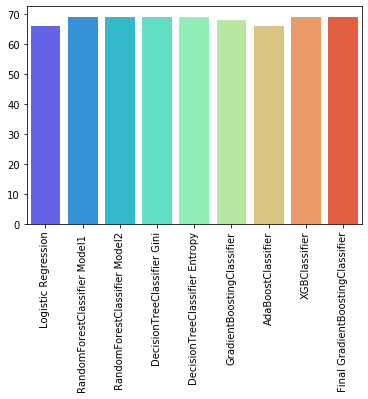

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ["Logistic Regression","RandomForestClassifier Model1 ","RandomForestClassifier Model2","DecisionTreeClassifier Gini",
           "DecisionTreeClassifier Entropy","GradientBoostingClassifier","AdaBoostClassifier",
    "XGBClassifier","Final GradientBoostingClassifier"]
Accuracy = [66,69,69,69,69,68,66,69,69]
sns.barplot(x = columns,y = Accuracy,palette = "rainbow" )
plt.xticks(rotation = "vertical")
plt.show();

Most of the models are predicting the same results
Random Forest Classifier,Decision Tree classifier,XGboosting with tuned parameters shows the best results,
compare to the Logistic Regression,Gradient Boosting Classifier,Adaboosting Classifier